# KVN, Margaret & bingo - Part 2
> Second part of a (hopefully) friendly introduction to Neural Networks and their capabilities. In this part, we will delve into loss functions, gradient descent and backpropagation as they are the building blocks required to train a Neural Network.


- toc: true 
- badges: false
- comments: true
- categories: [machine learning]

In [Part 1](https://bepuca.dev/machine%20learning/2020/05/24/kvn-part-1.html), we defined what we are trying to achieve (KVN whispering Margaret the drawn numbers) and what our proposed solution (a Neural Network).

## Learning time!
Now we have an idea of what the new system we want to implement to KVN will look like. The problem is we need to be able to train this system. That is, we need a method for KVN to learn to identify the numbers using this system.

In more mathematical terms, learning means finding the optimal parameter set of weights $w$ and biases $b$ such that, at the end, KVN gets the digit right the maximum possible number of times. This is actually a big optimization problem and the concepts used in smaller problems hold.

The main idea required so that KVN can learn is that he needs to understand when he is wrong and how wrong he is. Once this is defined, he can learn to be less wrong the next time he tries (i.e. the parameters can be optimized). Ideally, if he tries a lot of times, he will eventually be as right as he can be with the particular system we design for him.

### Wrongness meter (a.k.a Loss Function)
So, how can we define how wrong is KVN? The idea is to define what it is called a **loss function** or **cost function** $C$. This function must represent the distance between the truth (i.e. the correct digit) and the system's output (i.e. KVN's guess). That is, how wrong is KVN.

The two natural conditions that this function has to fulfill is that it has to depend on the output (otherwise it wouldn't make sense) and it has to be strictly positive (we will see in a moment why). Again, as in the activation function case, there are many different cost functions with different properties (but we won't enter into more detail here). Two of the most popular cost functions are:

- The **quadratic cost function**:

$$ C(w,b) = \frac{1}{2n} \sum_i \| o(i) - a(i)\|^2 $$

This function represent the mean quadratic distance over all inputs $i$ (all images to learn) between the output corresponding to the input (guess of each image) and the correct answer $a$. It solely depends on the system parameters $w, b$. $n$ is the total number of inputs. This is the traditionally used cost function in optimization (or regression) problems.

- The **cross entropy cost function**:

$$ C(w,b) = -\frac{1}{n} \sum_i [o\ln{a}+ (1-o)\ln{(1-a)}] $$

Notice that in this case, abusing notation, $a,o$ are equivalent to $a(i), o(i)$. This function is designed to solve some of the limitations of the quadratic cost function. In fact, cross-entropy is widely used in problems like the one we are trying to solve.

Now that KVN have a wrongness meter, how can we he use it to learn anything?

### The downhill bike (a.k.a. Gradient Descent)
The typical method to solve optimization problems is what it is called **gradient descent**. This might sound quite complicated but the main idea is rather simple. To illustrate, let's define an arbitrary cost function that depends only on a single variable $x$. The situation is the following:

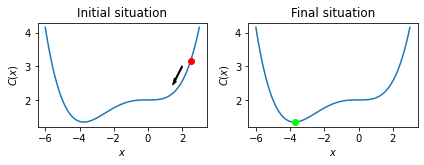

In [2]:
#collapse-hide
import numpy as np
import matplotlib.pyplot as plt

# Define x grid.
xx = np.linspace(-6,3,100)

# Arbitrary cost function.
def cost_fun(x):
    return 0.01*x**4 + 0.05*x**3 + 2

# Compute function shape.
y = cost_fun(xx)

fig = plt.figure(figsize=(6,2.4))

# Initial situation
ax1 = plt.subplot(121)
ax1.plot(xx, y, zorder=-1)
ax1.scatter(2.5, cost_fun(2.5), color='r')
ax1.arrow(2,3,-0.4,-0.4, width = 0.05, color='k')
ax1.set_title("Initial situation")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$C(x)$")

# Final situation
ax2 = plt.subplot(122)
ax2.plot(xx, y, zorder=-1)
ax2.scatter(xx[np.argmin(y)], min(y), color='lime')
ax2.set_title("Final situation")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$C(x)$");

plt.tight_layout()

The idea behind gradient descent is quite simple. Imagine that initially the KVN's system is quite wrong and we start in the leftmost situation. We compute the cost function and it happens that we are far away from the minimum, which represents the least possible error we can have with our system (that is why we needed a positive function as having negative errors doesn't make much sense). Qualitatively, we would like to *go downhill* until we reach the minimum of the cost function, as in the leftmost plot. Following this explanation, we can imagine gradient descent as *downhill biking*.

Nonetheless, there is no easy way to know if we are at the very minimum. What we can do is look at our hill and see if we are in a slope. If that is the case, we ride our bike downhill a little bit before checking again. If we repeat this procedure many many times, we will end up, ideally, in the rightmost situation: we are in the minimum (i.e. KVN gets it right the maximum number of times the system allows him) so the system is optimized.

Mathematically, the slope is the derivative of the cost function with respect to the parameter set evaluated at the current parameter set. Therefore, the idea behind gradient descent is that we iteratively compute the derivative and update our parameter set such that we get closer to the minimum. Hopefully, in the end, we will reach the global minimum. The expression used for this update is:

$$ v \rightarrow v' = v - \eta \nabla C$$

Here, $v$ is the parameter set $w, b$ of the system. $\eta$ is what it is called the **learning rate** which is equivalent to how long are our rides with the bycicle between slope checks. If it is too small, we will never reach the valley. If it is too big, we will end up going from one side of the valley to the other one, never reaching the bottom. The $\nabla C$ is the **gradient of the cost function**, which is equivalent to the slope of the mountain. There is a $-$ sign because we always want to go down. Remember that we are downhill biking!

The next question one might ask is:

*Okay... but how exactly do you determine the slope of a mountain with a hell lot of dimensions?!*

Remember that we have a lot of parameters and each parameter corresponds to a dimension. Thus, we have as many dimensions as parameters. The example above have only one dimension. Thus, this is a totally valid question. How would you know where *down* is if you were in a world that has 1000 dimensions? (Our world have three spatial dimensions).

As we have seen, the slope corresponds to the gradient. In computational sciences, gradients are usually computed by what is called **finite differences**. We won't discuss that here but the idea is that it requires to compute what happens to the cost function if we vary by a small amount a single parameter. And repeat for all parameters. This means that in order to determine the slope at every check, we have to compute the cost function as many times as parameters we have (a lot). And remember that in order to evaluate the cost functions we saw above we have to evaluate all training examples. Although this works, it is extremely slow. And by extremely I mean prohibitively slow. In our biking situation, night would fall upon us and no one wants to bike at night, for night is dark and full of terrors.

One way to speed things up is what is called **stochastic gradient descent**. The idea is that instead of using *all* input examples at each step, we use a random subsample of them, a *mini-batch* at each slope check. Then, the cost function is computed for this subsample and used to determine the slope. In the next check, a different subsample is used. This procedure is repeated until all training samples have been used which is said to complete an *epoch* of training. After each epoch, the procedure is started again. 

Using this method, we only get an idea of where down is at each check, but an idea is sufficient to advance a bit. It is like our sense of equilibrium is a bit distorted but we always know more or less where down is. That way, KVN only has to look at a fraction of the images to learn a bit and is faster in dismounting, checking and riding the bike again. The path that KVN will follow with stochastic gradient descent will be less direct but the overall ride will also be much faster. Altough this method can improve the speed, the slope check is still too slow.

### The slopemeter (a.k.a. Backpropagation)

The method usually used to compute the slope is the **backpropagation algorithm**. The idea is that using the chain rule of basic calculus, we can compute which effect a small perturbation of a parameter will have in the final cost function. These effects are actually the derivatives we were talking before, so what we are saying is that we use the chain rule to obtain simple forms to compute the derivatives. The name backpropagation comes from the fact that the algorithm starts at the output, and from the error in the cost function backpropagates through the network computing these perturbations and thus, obtaining the derivatives.

In the end, this means that each slope check, the network has to be used once per training sample (or image) in the mini-batch in the forward direction to compute the cost function (check how wrong KVN is in each image) and once per sample in the backward direction to compute the gradient (how different would be the error if some parameter was different). In the end, this method is much much faster than finite differences and allow neural networks to be really feasible.

My dear readers, we have finally revised all the building blocks required to understand the system we intend to implement into KVN for him to recognize the bingo digits. Time to get the job done! In the next part, we will finally teach KVN what it needs to know!
